In [1]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_moons, make_regression
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [64]:
X, y = make_regression(n_samples=400,n_features = 1, noise = 30, random_state=42)

<function matplotlib.pyplot.show(close=None, block=None)>

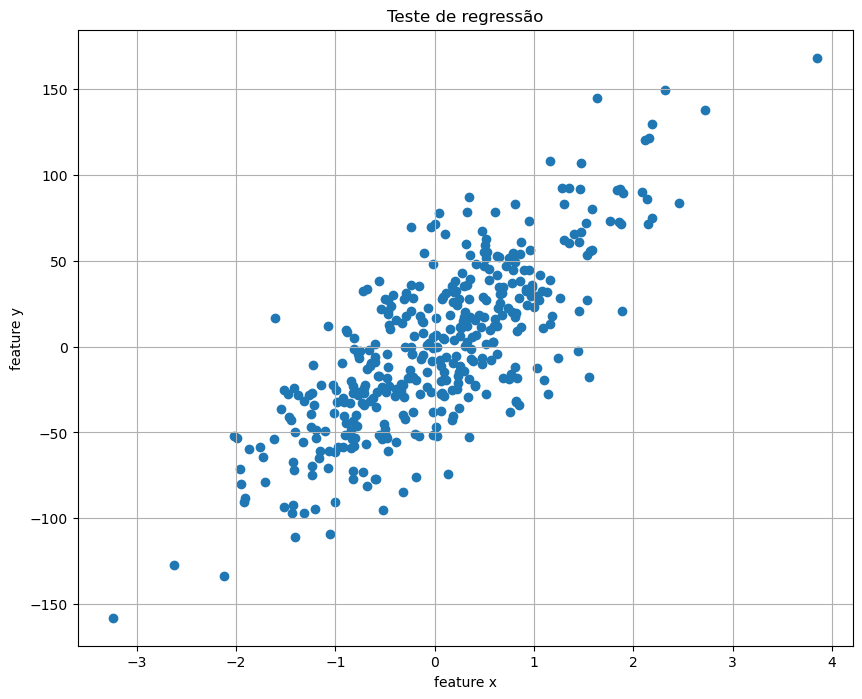

In [65]:
plt.figure(figsize=(10,8))
plt.scatter(X[:, 0],y,marker='o')
plt.title('Teste de regressão')
plt.xlabel('feature x') 
plt.ylabel('feature y') 
plt.grid(True)
plt.show

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
print(f"Shape de X_train: {X_train.shape}")
print(f"Shape de X_test: {X_test.shape}")

Shape de X_train: (280, 1)
Shape de X_test: (120, 1)


In [68]:
dt_reg = DecisionTreeRegressor(max_depth = 5, random_state= 42)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [69]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [70]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [71]:
y_hat_dt = dt_reg.predict(X_test)
y_hat_knn = knn_reg.predict(X_test)
y_hat_lin = lin_reg.predict(X_test)

#Modelos já treinados

In [72]:
print(f'DecisionTree = {y_hat_dt[:5]}')
print(f'KNeighbors = {y_hat_knn[:5]}') 
print(f'Linear Regression = {y_hat_lin[:5]}')

DecisionTree = [ 14.73832104 -15.13894148 -22.49960358 -22.49960358   3.48486362]
KNeighbors = [ 27.1662862    2.40789926  -6.98804487 -24.29651266   4.00493996]
Linear Regression = [ 36.85201506  -9.93693546 -19.70421548 -29.30206812  -2.6963342 ]


In [73]:
import pandas as pd


In [74]:



resultados = {'Modelo': ['Decision Tree', 'KNeighbors', 'Linear Regression']}
metricas = {'MSE': [], 'MAE': [], 'R2': []}

previsoes = [y_hat_dt, y_hat_knn, y_hat_lin]

for y_hat in previsoes:
    mse = mean_squared_error(y_test, y_hat)
    metricas['MSE'].append(mse)
    
    mae = mean_absolute_error(y_test, y_hat)
    metricas['MAE'].append(mae)
    
    r2 = r2_score(y_test, y_hat)
    metricas['R2'].append(r2)

resultados.update(metricas)

df_resultados = pd.DataFrame(resultados)

print(df_resultados.to_markdown(index=False))

| Modelo            |     MSE |     MAE |       R2 |
|:------------------|--------:|--------:|---------:|
| Decision Tree     | 853.081 | 23.1827 | 0.599527 |
| KNeighbors        | 807.929 | 22.6418 | 0.620723 |
| Linear Regression | 779.422 | 22.6117 | 0.634106 |


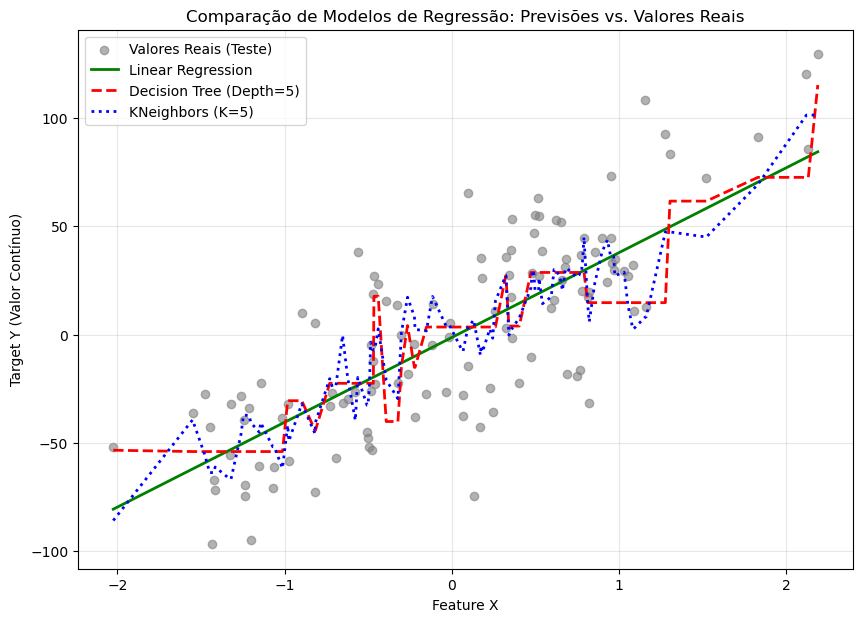

In [75]:

sorted_idx = X_test[:, 0].argsort()

X_test_sorted = X_test[sorted_idx]
y_test_sorted = y_test[sorted_idx]
y_hat_dt_sorted = y_hat_dt[sorted_idx]
y_hat_knn_sorted = y_hat_knn[sorted_idx]
y_hat_lin_sorted = y_hat_lin[sorted_idx]

plt.figure(figsize=(10, 7))

plt.scatter(X_test_sorted, y_test_sorted, color='gray', label='Valores Reais (Teste)', alpha=0.6)

plt.plot(X_test_sorted, y_hat_lin_sorted, color='green', linewidth=2, label='Linear Regression')
plt.plot(X_test_sorted, y_hat_dt_sorted, color='red', linewidth=2, linestyle='--', label='Decision Tree (Depth=5)')
plt.plot(X_test_sorted, y_hat_knn_sorted, color='blue', linewidth=2, linestyle=':', label='KNeighbors (K=5)')

plt.title('Comparação de Modelos de Regressão: Previsões vs. Valores Reais')
plt.xlabel('Feature X')
plt.ylabel('Target Y (Valor Contínuo)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

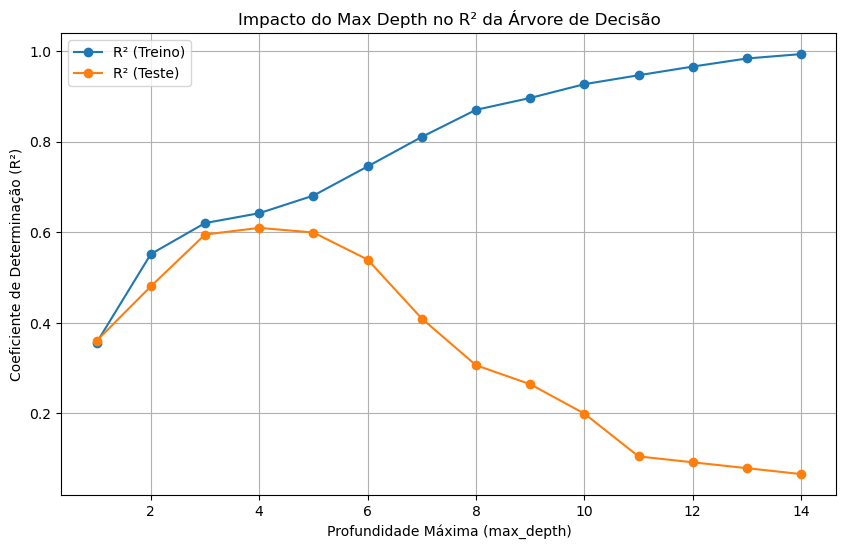

In [76]:

depths = range(1, 15)
r2_train = []
r2_test = []

for depth in depths:
    dt_reg = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dt_reg.fit(X_train, y_train)
    
    y_train_hat = dt_reg.predict(X_train)
    y_test_hat = dt_reg.predict(X_test)
    
    r2_train.append(r2_score(y_train, y_train_hat))
    r2_test.append(r2_score(y_test, y_test_hat))

plt.figure(figsize=(10, 6))
plt.plot(depths, r2_train, label='R² (Treino)', marker='o')
plt.plot(depths, r2_test, label='R² (Teste)', marker='o')
plt.title('Impacto do Max Depth no R² da Árvore de Decisão')
plt.xlabel('Profundidade Máxima (max_depth)')
plt.ylabel('Coeficiente de Determinação (R²)')
plt.grid(True)
plt.legend()
plt.show()



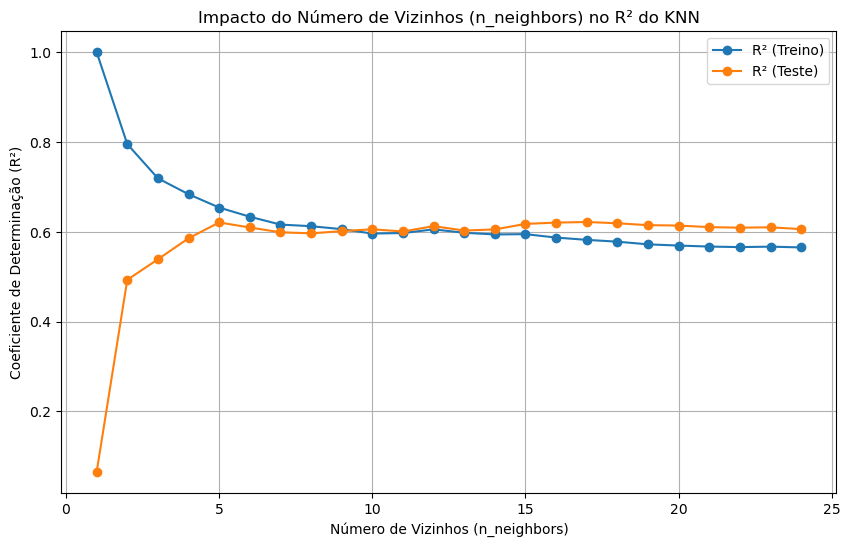

In [77]:

neighbors = range(1, 25) 
r2_train = []
r2_test = []

for n in neighbors:
    knn_reg = KNeighborsRegressor(n_neighbors=n)
    knn_reg.fit(X_train, y_train)
    
    y_train_hat = knn_reg.predict(X_train)
    y_test_hat = knn_reg.predict(X_test)
    
    r2_train.append(r2_score(y_train, y_train_hat))
    r2_test.append(r2_score(y_test, y_test_hat))

plt.figure(figsize=(10, 6))
plt.plot(neighbors, r2_train, label='R² (Treino)', marker='o')
plt.plot(neighbors, r2_test, label='R² (Teste)', marker='o')
plt.title('Impacto do Número de Vizinhos (n_neighbors) no R² do KNN')
plt.xlabel('Número de Vizinhos (n_neighbors)')
plt.ylabel('Coeficiente de Determinação (R²)')
plt.grid(True)
plt.legend()
plt.show()



# 

O maior aprendizado deste projeto foi entender que mudar o tipo de problema de Machine Learning não é só trocar uma linha de código, mas sim uma mudança de mindset. Quando saímos da Classificação e entramos na Regressão, todo o nosso arsenal de trabalho precisa ser ajustado.

1. A principal diferença é o que estamos tentando prever:Classificação é tipo dar um rótulo (ex: "é fraude" ou "não é fraude").Regressão é prever um valor exato, contínuo, tipo estimar o preço de um imóvel ou o salário de alguém.No nosso caso, trocamos o dataset make_moons (que gera apenas classes 0 e 1) pelo make_regression, que nos deu uma variável alvo (o $y$) que pode ser qualquer número, forçando os modelos a serem mais precisos.

2. Tive que trocar o GaussianNB (classificação) pela LinearRegression. Se a saída é um número, a ferramenta tem que ser um Regressor (DecisionTreeRegressor, KNeighborsRegressor), ou não funciona.

3. Em um problema de regressão, não existe "certo ou errado". Um erro de R$10 é muito melhor que um erro de R$1.000. Por isso, a Acurácia perde totalmente o sentido e é substituída por:MSE e MAE: Essas métricas medem a distância do nosso erro. O MSE é ótimo porque ele pune muito mais os erros grotescos (o que é bom para evitar grandes perdas).$R^2$: Ele se torna nossa "nota final". Se ele estiver perto de 1, significa que o nosso modelo consegue explicar quase toda a variação dos dados, o que é um ótimo sinal de que ele realmente entendeu o padrão.

4. A visualização e a análise de hiperparâmetros foram essenciais para ilustrar a famosa troca entre Viés e Variância:
Viés (Underfitting): É o modelo "preguiçoso". Se ele é muito simples (max_depth baixo na Árvore ou n_neighbors alto no KNN), ele não se esforça para aprender os detalhes dos dados de treino, e o erro é ruim em todo lugar.

Variância (Overfitting): É o modelo "obcecado". Ele memoriza perfeitamente os dados de treino (R^2 de treino perto de 1), mas falha miseravelmente em dados novos (teste).A otimização de hiperparâmetros (que fizemos testando diferentes max_depth e n_neighbors) é a busca pelo ponto ideal onde o modelo é complexo o suficiente para aprender o padrão, mas não tanto a ponto de confundir ruído com informação.